In [61]:
%pwd
os.chdir("/Users/ruchirkanthgandikota/Documents/ML Projects/Wine Quality/end-to-end-mlproject")

In [62]:
import pandas as pd 
import os 
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [63]:
os.chdir("/Users/ruchirkanthgandikota/Documents/ML Projects/Wine Quality/end-to-end-mlproject")

In [64]:
df = pd.read_csv("data/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [65]:
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [66]:
def handle_outliers_iqr(df):
    # Copy the DataFrame to avoid modifying the original
    df_cleaned = df.copy()
    
    # Loop through each numerical column
    for column in df_cleaned.columns[:-1]:  # Exclude 'quality' since it's the target
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with the median
        median = df_cleaned[column].median()
        df_cleaned[column] = df_cleaned[column].apply(
            lambda x: median if (x < lower_bound or x > upper_bound) else x
        )
    
    df_cleaned['quality'] = df['quality']
    return df_cleaned

# Apply the function
outlier_handled_data = handle_outliers_iqr(df)



In [67]:
outlier_handled_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [68]:
X = outlier_handled_data.drop("quality", axis=1)
y = outlier_handled_data["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


XGBoost

AUC-ROC Score: 0.9375


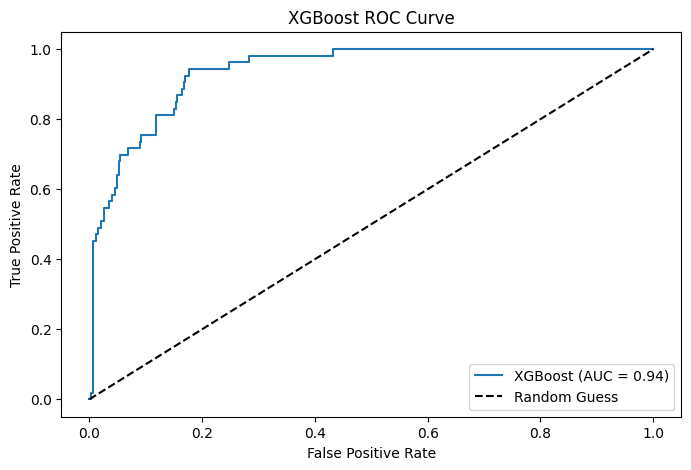

In [69]:



# Initialize and train the XGBoost classifier
xgb_model = XGBClassifier(
    objective='binary:logistic',  # Binary classification
    eval_metric='auc',  # Use AUC as the evaluation metric
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Predict probabilities
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc='lower right')
plt.show()